# Advanced droughts workflow

Click [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CLIMAAX/DROUGHTS/main?labpath=DROUGHTS_notebook_1.ipynb) to launch this workflow on MyBinder. 

# About droughts and droughts' risks

## What is a drought?

Simply stated, drought is ‘the extreme persistence of precipitation deficit over a specific region for a specific period of time’. Droughts are often classified into three main types different by their severity, impacts, and time scales:

1. <ins>Meteorological drought</ins> is often caused by short-term precipitation deficiency and its impacts highly depend on its timing. For example, lack of rain during the sprouting phase in rain-fed agriculture could lead to crop failure. 
2. <ins>Agricultural drought</ins> is a medium-term phenomenon, characterized by reduced soil moisture content and is caused by a prolonged period of meterological drought. 
3. On the long-term, <ins>hydrological drought</ins> is characterized by lower stream flow, reduced water level in water bodies, and may affect groundwater storage. 

The cascade between drought types is goverened by the severity (i.e., magnitude), duration, and spatio-temporal distribution of drought events.

## How do we assess drought risk?

Drought risk is a measure for quantifying the likelyhood of a meaningfull impact from drought-event(s) on human population, its economic activity and assets, and the environment. The risk for an impact depends on the <ins>drought hazard</ins>, <ins>exposure</ins>, and the <ins>vulnerability</ins> to droughts. 
<ul>
    <li><ins>Hazard</ins> measures the magnitude, duration, and timing of drougt events.</li> 
<li><ins>Exposure</ins> to droughts represent the spatial distribution of drought relative to distribution of potentially impactful systems, e.g., location of cultivated land, wetlands, etc.</li>
<li><ins>Vulnerability</ins> stands for the level of impact expected for a given system during a given event, and is affected by the systems' intrinsic attributes. For example, fields with drought-resistent crops varities would be less vulnerable to droughts.</li>
    </ul>
This workflow quantifies drought risk as the product of drought hazard, exposure and vulnerability. The methodology used here was developed and applied globally by Carrão et al. (2016). The result of this workflow is a risk map showing the relative drought riskat the NUTS3 level for a selected NUTS2 unit.

<div class="alert alert-block alert-warning">
    <p><u> How to use this workflow?</u></p>
    The workflow contains precalculated results, which can be explored in the visualization workflow. Users inputs is optional and can be fed into the hazard workflow, risk workflow (e.g., exposures, and/or vulnerability), or both. <br/>The drought hazard and risk workflow are applied at national scale and a NUTS3 resolution. Thus, user inputs should cover the all NUTS3 in a country.</div>

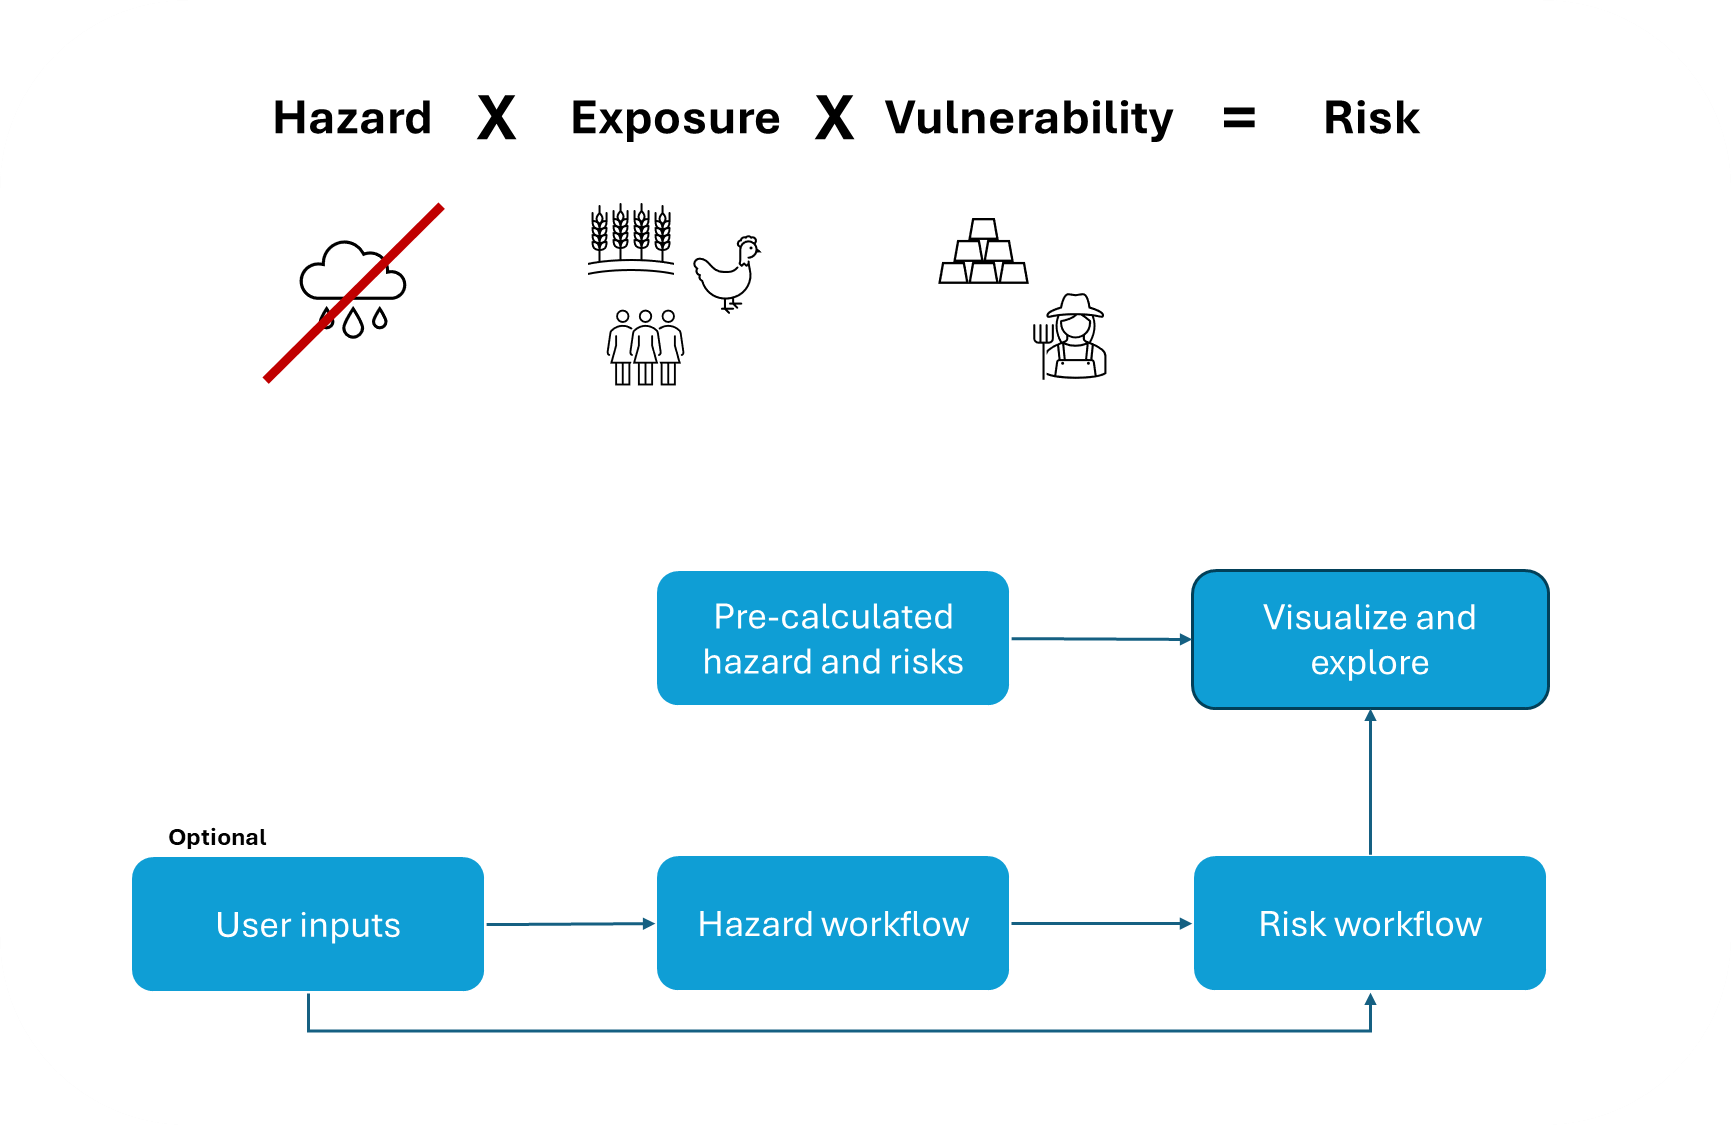

## What data does the workflow require?

### Hazard data and methods:

Drought hazard for a given region is estimated as the probability of exceedance the median of regional (e.g., EU level) severe precipitation deficits for an historical reference period (e.g. 1979-2019) or for a future projection period (e.g. 2015-2100).<br/>

<div class="alert alert-block alert-warning">
    The expected data format is a table where each row represents the total precipitation in mm for a month/year combination, and each column represents an area of interest (e.g. NUTS2 region). The first column contains the date in this format YYYY-MM-DD. The <b>title of the first columns has to be 'timing' and the rest of the titles have to be the codes of the areas of interest (e.g. NUTS3), which have to be identical to the codes as they appear in the NUTS3 spatial data from the <a href = "https://ec.europa.eu/eurostat/en/web/nuts/background">European Commission</a></b>.
    </div>
    
    
In the historic workflow, we used GSWP3 and W5E5 global meteorological forcing data processed for ISIMIP3a, sets on a 0.5°x0.5°C global grid and at daily time steps for the historical period of 1979-2019 (https://doi.org/10.48364/ISIMIP.982724.2). For the future projections, we used the ISIMIP3b bias-adjusted atmospheric climate input data, available for 5 CMIP6 global climate models (GFDL-ESM4, IPSL-CM6A-LR, MPI-ESM1-2-HR, MRI-ESM2-0, UKESM1-0-LL), and three SSP-RCPs combinations (SSP126, SSP370, SSP585) (https://doi.org/10.48364/ISIMIP.842396.1). <br/>

Processing these data is performed by applying Geographic Information System (GIS) techniques, to extract an aggregated value (e.g., total precipitation) of the data points located within each area of interest (e.g., NUTS2 region). Zonal statistics is widely used for that purpose, and it was the method used in our data processing.

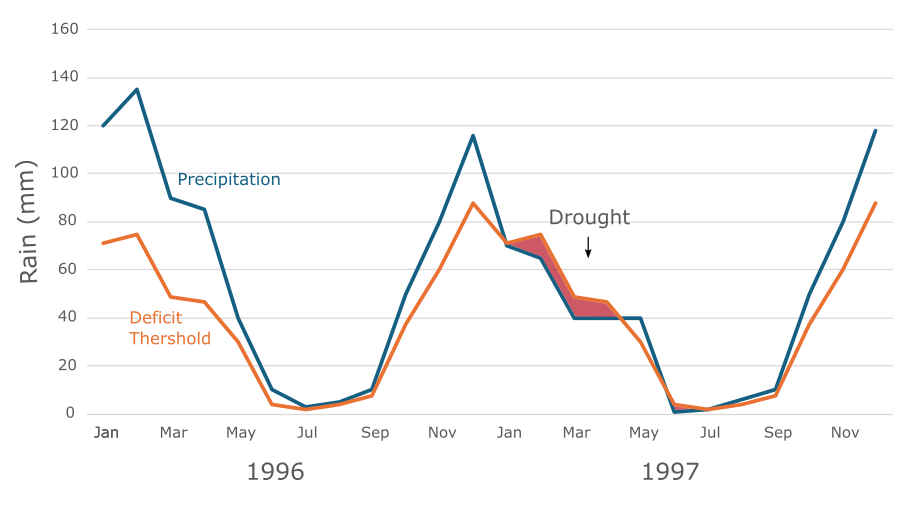

For estimating drought hazard, this workflows requires monthly total precipitation for each NUTS3 region during the historical reference period or future projection period in a selected country.  




### Exposure data and methods:

Drought exposure indicates the potential losses from different types of drought hazards in different geographical regions. In general, exposure data identifies and quantifies the different types of physical entities on the ground, including built assets, infrastructure, agricultural land, people, livestock, etc. that can be affected by drought (e.g. the number of cars does not count).

Quantyfing drought exposure utilizes a non-compensatory model to account for the spatial distribution of a potential impact for crops and livestock, competition on water (e.g., for industrial uses represented by the water stress indicator), and human direct need (e.g., for drinking represneted by population size). More information can be found in the dropdown box below.

<div class="alert alert-block alert-warning">
    The algorithm expects a table in which each row represent an area of interest, and each column a variable. The <b>first column contains the codes of the area of interest (e.g., NUTS3), which have to be identical to the codes as they appear in the NUTS3 spatial data from the <a href = "https://ec.europa.eu/eurostat/en/web/nuts/background">European Commision</a></b>.
    </div>

In this workflow we used the following data (provided in the exposure sample file):

#### Data Inventory

| Data item | Period | Description | Format and processing | Source |
| :-: | :-: | :- | :- | :-: |
| Cropland | Historic | Harvested land represents the exposure of agricultural activity to droughts. SPAM is a global crop distribution model covering 42 crops and four different technologies available for 2010 (latest). The model outputs include both harvested and physical cropland. | 5 arc-minutes crop-specific grid. All grids are to be summed and aggregated (using Zonal Statistics) per area of interest. | https://mapspam.info/ |
| Cropland | Future | Cropland landcover under different Shared Socio Economic Pathways (SSPs) is a downscaled dataset of the integrated assessment model (IAM) GCAM. | The grid-cell area of a 30 arc-seconds land use grid, was summed for all cropland cells and aggregated (using Zonal Statistics) per area of interest. | [Zhang, Cheng, and Wu, 2023](https://www.nature.com/articles/s41597-023-02637-7#Sec1) |
| Livestock density | Historic | Livestock density represents the exposure of animal husbandry systems to droughts. The Gridded Livestock of the World maps (GLW) show the density of eight different livestock animals in 2010 and 2015. | 5 arc-minutes animal-specific grid. All grids are to be summed and aggregated (using Zonal Statistics) per area of interest. | https://www.fao.org/livestock-systems/global-distributions/en/ |
| Livestock density | Future | Not Available | Not Available | Not Available |
| Competition on water | Historic | The water stress indicator is a proxy for competition on water, as it accounts for both multi-sectoral water demand, relative to the abundance of water. Values higher than 0.4 indicate on severe water stress and a high competition on water resources. |  Aqueduct v.4 provides global water-stress estimates at sub-catchment scale.  We have rasterized the water stress and water withdrawal, and calculated a weighted average water stress per unit of interest. | https://www.wri.org/data/aqueduct-global-maps-40-data |
| Competition on water | Future | The water stress indicator is a proxy for competition on water, as it accounts for both multi-sectoral water demand, relative to the abundance of water. Values higher than 0.4 indicate on severe water stress and a high competition on water resources. |  Aqueduct v.4 provides global water-stress estimates at sub-catchment scale.  We have rasterized the water stress and water withdrawal, and calculated a weighted average water stress per unit of interest. | https://www.wri.org/data/aqueduct-global-maps-40-data |
| Human direct need | Historic | Population counts represent the basic drinking water requirements across regions. Considering a similar economic and social context, these counts can also indicate the toal doemtic water demand. Global gridded population products are available at high resolution and multiple years, yet for the scope of the EU, a data from EUROSTAT is readily available.| EUROSTAT data is available as tabular format for the NUTS3 regions.| https://ec.europa.eu/eurostat/ |
| Human direct need | Future | Population counts represent the basic drinking water requirements across regions. Considering a similar economic and social context, these counts can also indicate the total domestic water demand. Global gridded population products are available at high resolution and multiple years, and for this analysis - the rural and urban populations grid from Global CWatM were used.| Global CWatM provides rural and urban population grids at a spatial resolution of 5 arc-minutes. | - |

Depending on the region of interest, other indicators may also be relevant for estimating drought exposure. We recommend that users research the most relevant factors in the region that may be exposed to drought before starting the analysis. 


### Vulnerability data and methods:

Vulnerability data describes the elements that make a system susceptible to a natural hazard, which vary depending on the type of hazard and the nature of the system. However, there are some generic indicators such as poverty, health status, economic inequality and aspects of governance, which apply to all types of exposed parts and therefore remain constant despite changes in the type of hazard that pose a risk.

In this workflow, the selection of proxy indicators follows the criteria defined by Naumann et al. (2014): the indicator has to represent a quantitative or qualitative aspect of vulnerability factors to drought (generic or specific to some exposed element), and public data need to be freely available at the European (instead of global) scale, and at a subnational (NUTS3) resolution. 

The vulnerability indicators are common proxies for economic, social, and infrastructural factors of drought vulnerability in each geographic location. We recommend that users research the most relevant factors in the region that make it vulnerable to drought before starting the analysis. As we currently only propose two vulnerability indicators, we do not divide the input data into different factors (e.g., economic, social, or infrastructure), rather we relate it to 'overall' vulnerability.

<div class="alert alert-block alert-warning">
The algorithm expects a table in which each row represent an area of interest, and each column a variable. <b> If different factors of vulnerability are accounted for (e.g., social, economic, etc.); each variable has to be named with a prefix according to the factor, i.e. Social_ Economic_ or Infrast_, followed by a number or the name of the variable. The first column contains the codes of the area of interest (e.g., NUTS3), which have to be identical to the codes as they appear in the NUTS2 spatial data from the  <a href = "https://ec.europa.eu/eurostat/en/web/nuts/background">European Commision</a>.</b>
</div>

In this workflow we used the following data (provided in the vulnerability sample file):

#### Data Inventory

| Factor | Data item | Period | Description | Format and processing | Correlation with Vulnerability | Source |
| :-: | :-: | :-: | :- | :- | :-: | :-: |
| Overall | GDP per capita (current US dollar) | Historic | Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period by a country or countries. | Data is available as global grids at a 30 arc-secondes resolution from Global CWatM. The GDP per capita was calculated by dividing the  GDP by the total population counts, for each NUTS3 unit. | - | - |
| Overall | GDP per capita (current US dollar) | Future | Future Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period by a country or countries. | Data is available as global grids at a 30 arc-secondes resolution. | - | [Wang and Fubao, 2022](https://zenodo.org/records/5880037) |
| Overall | Rural population | Historic | Percentage of total population in a country or region that lives in rural areas. | Data is available as global grids at a 30 arc-secondes resolution from Global CWatM. The share of rural population was calculated by dividing the rural by the total population counts.| + | - |
| Overall | Rural population | Future | Percentage of total population in a country or region that lives in rural areas. | Data is available as global grids at a 30 arc-secondes resolution from Global CWatM. The share of rural population was calculated by dividing the rural by the total population counts. | + | - |


<div class="alert alert-block alert-warning">
   <b><u>Is including multiple vulnerability facotrs possible?</u></b><br/>
Vulnerability to drought is computed as a 2-step composite model that derives from the aggregation of proxy indicators representing different factors like: economic, social, and infrastructural. 
In the first step, indicators for each factor (i.e. economic, social and infrastructural) are combined using data envelopment analysis (DEA). In the second step, individual factors resulting from independent DEA analyses are arithmetically aggregated (using the simple mean) into a composite model of drought vulnerability (dV):

$$dv_i = \frac{\sum{factor_{i,j}}}{n}$$

where factor$_{i,j}$ represents the vulnerability scores for the selected factor $j$ and region $i$ (e.g, social, and economic), and $n$ is the number of selected factors.
<br/> <br/>
    
<b><u>Are there example for vulnerability indicators?</u></b><br/> <br/>
<ul>    
<li><u>Economic indicators</u> may include energy use per person (negatively correlated with vulnerability; -), Agriculture value added on the GDP (+),  and GDP per capita (-).</li>
<li><u>Social indicators</u> may include the share of rural population (+), share of people with access to safely managed drinking water (-), life expectancy at birth (+), share of population at working age (-), management of water related disasters (-), and government effectivness (+).</li>
<li><u>Infrastructure indicators</u> may include percentage of irrigated land (-), and road density (-).</li>
</ul>
</div>

